**© 2021 Scott A. Bruce. Do not distribute.**

Much of the following examples are adapted from the DataCamp course **Parallel Computing with Dask**.  You may access this course via DataCamp for more details.  

# 1. Understanding computer storage and big data

Hard disks are used for permanent storage. Currently, hard disks can accommodate terabytes of data but require **milliseconds** to access data.

<div>
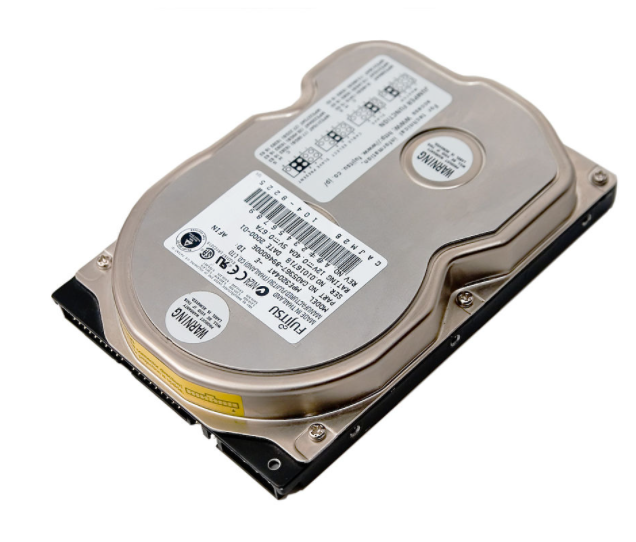
</div>

Random Access Memory (RAM) are used for temporary storage. Data in RAM disappears when shut down. Data can be retrieved from RAM in **nanoseconds to microseconds**, but the largest RAM configurations are a handful of gigabytes at best today.

<div>
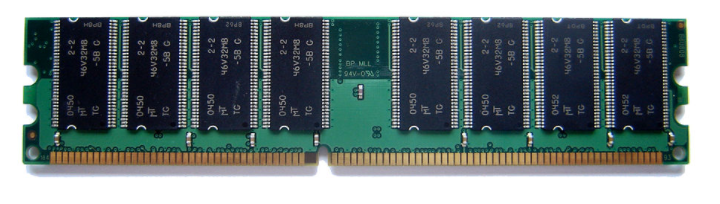
</div>

Big data at a high level refers to data that cannot be stored within RAM on a single machine.  In this case, data are processed in **chunks** either sequentially on a single machine (such that all the data are not read into RAM and processed all at once) or in a distributed manner over many machines (see past lecture on Big Data and Cloud Computing).  

This means that data processing workflow steps that usually take seconds may take minutes or days, depending on the scalability of your big data processing solution.

# 2. Assessing memory usage in Python

Traditional data science Python packages (think NumPy and pandas) stores the entire dataset in RAM and processes data entirely in RAM.  With that in mind, let's take a look at how we can determine memory usage in Python

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import psutil, os, numpy as np, pandas as pd

#memory usage for creating 50MB array
before = psutil.Process(os.getpid()).memory_info().rss/1024**2
N = (1024**2)//8 #Number of floats that fill 1MB
x = np.random.randn(50*N) #Random array filling 50MB
after = psutil.Process(os.getpid()).memory_info().rss/1024**2
print(after-before) #memory usage by Python process (MB)
print(x.nbytes/1024**2) #memory consumed by elements of the array (MB)

#memory usage for manipulating 50MB array
before = psutil.Process(os.getpid()).memory_info().rss/1024**2
y = x ** 2
after = psutil.Process(os.getpid()).memory_info().rss/1024**2
print(after-before) #memory usage by Python process (MB)

#pandas dataframe
df = pd.DataFrame(x)
print(df.memory_usage()//(1024**2)) #memory consumed by pandas dataframe elements (MB)

50.1875
50.0
49.96875
Index     0
0        50
dtype: int64


# 3. Thinking about data in chunks

We've seen that available memory & storage restricts datasets that can be analyzed. A common strategy is to subdivide datasets into smaller parts.

In [2]:
#read data all into memory at once
df = pd.read_csv('HTRU_2.csv',header=None) 
df.columns = [['Mean of integrated profile', 'Standard deviation of integrated profile', 'Excess kurtosis of integrated profile', 'Skewness of integrated profile', 'Mean of DM-SNR curve', 'Standard deviation of DM-SNR curve', 'Excess kurtosis of DM-SNR curve', 'Skewness of DM-SNR curve', 'Class' ]] 
df.head()
df.info()
len(df)
print(df.memory_usage(index=False)) #in bytes since all together data only 1.2 MB

Mean of integrated profile Standard deviation of integrated profile  \
0                 140.562500                                55.683782   
1                 102.507812                                58.882430   
2                 103.015625                                39.341649   
3                 136.750000                                57.178449   
4                  88.726562                                40.672225   

  Excess kurtosis of integrated profile Skewness of integrated profile  \
0                             -0.234571                      -0.699648   
1                              0.465318                      -0.515088   
2                              0.323328                       1.051164   
3                             -0.068415                      -0.636238   
4                              0.600866                       1.123492   

  Mean of DM-SNR curve Standard deviation of DM-SNR curve  \
0             3.199833                          19.110426   
1             1.677258                          14.860146   
2             3.121237                          21.744669   
3             3.642977                          20.959280   
4             1.178930                          11.468720   

  Excess kurtosis of DM-SNR curve Skewness of DM-SNR curve Class  
0                        7.975532                74.242225     0  
1                       10.576487               127.393580     0  
2                        7.735822                63.171909     0  
3                        6.896499                53.593661     0  
4                       14.269573               252.567306     0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   (Mean of integrated profile,)                17898 non-null  float64
 1   (Standard deviation of integrated profile,)  17898 non-null  float64
 2   (Excess kurtosis of integrated profile,)     17898 non-null  float64
 3   (Skewness of integrated profile,)            17898 non-null  float64
 4   (Mean of DM-SNR curve,)                      17898 non-null  float64
 5   (Standard deviation of DM-SNR curve,)        17898 non-null  float64
 6   (Excess kurtosis of DM-SNR curve,)           17898 non-null  float64
 7   (Skewness of DM-SNR curve,)                  17898 non-null  float64
 8   (Class,)                                     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


17898

Mean of integrated profile                  143184
Standard deviation of integrated profile    143184
Excess kurtosis of integrated profile       143184
Skewness of integrated profile              143184
Mean of DM-SNR curve                        143184
Standard deviation of DM-SNR curve          143184
Excess kurtosis of DM-SNR curve             143184
Skewness of DM-SNR curve                    143184
Class                                       143184
dtype: int64


In [3]:
#chunking the data
for chunk in pd.read_csv('HTRU_2.csv',header=None,chunksize=1000):
    print(type(chunk),chunk.shape)

<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (1000, 9)
<class 'pandas.core.frame.DataFrame'> (898, 9)


In [4]:
#filtering a chunk
for chunk in pd.read_csv('HTRU_2.csv',header=None,chunksize=1000):
    chunk.columns = [['Mean of integrated profile', 'Standard deviation of integrated profile', 'Excess kurtosis of integrated profile', 'Skewness of integrated profile', 'Mean of DM-SNR curve', 'Standard deviation of DM-SNR curve', 'Excess kurtosis of DM-SNR curve', 'Skewness of DM-SNR curve', 'Class' ]]
    large_mean = (chunk['Mean of integrated profile']>100)
    chunk.loc[large_mean.iloc[:,0]].shape

(777, 9)

(767, 9)

(753, 9)

(647, 9)

(701, 9)

(678, 9)

(833, 9)

(717, 9)

(792, 9)

(746, 9)

(768, 9)

(705, 9)

(806, 9)

(774, 9)

(829, 9)

(812, 9)

(824, 9)

(708, 9)

In [5]:
#chunking and filtering together
chunks = [] #list of dataframes
for chunk in pd.read_csv('HTRU_2.csv',header=None,chunksize=1000):
    chunk.columns = [['Mean of integrated profile', 'Standard deviation of integrated profile', 'Excess kurtosis of integrated profile', 'Skewness of integrated profile', 'Mean of DM-SNR curve', 'Standard deviation of DM-SNR curve', 'Excess kurtosis of DM-SNR curve', 'Skewness of DM-SNR curve', 'Class' ]] 
    large_mean = (chunk['Mean of integrated profile']>100)
    chunks.append(chunk.loc[large_mean.iloc[:,0]])

large_mean_df = pd.concat(chunks)
large_mean_df.shape
large_mean_df

(13637, 9)

Mean of integrated profile Standard deviation of integrated profile  \
0                     140.562500                                55.683782   
1                     102.507812                                58.882430   
2                     103.015625                                39.341649   
3                     136.750000                                57.178449   
6                     119.484375                                48.765059   
...                          ...                                      ...   
17891                 118.484375                                50.608483   
17893                 136.429688                                59.847421   
17894                 122.554688                                49.485605   
17895                 119.335938                                59.935939   
17896                 114.507812                                53.902400   

      Excess kurtosis of integrated profile Skewness of integrated profile  \
0                                 -0.234571                      -0.699648   
1                                  0.465318                      -0.515088   
2                                  0.323328                       1.051164   
3                                 -0.068415                      -0.636238   
6                                  0.031460                      -0.112168   
...                                     ...                            ...   
17891                             -0.029059                      -0.027494   
17893                             -0.187846                      -0.738123   
17894                              0.127978                       0.323061   
17895                              0.159363                      -0.743025   
17896                              0.201161                      -0.024789   

      Mean of DM-SNR curve Standard deviation of DM-SNR curve  \
0                 3.199833                          19.110426   
1                 1.677258                          14.860146   
2                 3.121237                          21.744669   
3                 3.642977                          20.959280   
6                 0.999164                           9.279612   
...                    ...                                ...   
17891             0.422241                           8.086684   
17893             1.296823                          12.166062   
17894            16.409699                          44.626893   
17895            21.430602                          58.872000   
17896             1.946488                          13.381731   

      Excess kurtosis of DM-SNR curve Skewness of DM-SNR curve Class  
0                            7.975532                74.242225     0  
1                           10.576487               127.393580     0  
2                            7.735822                63.171909     0  
3                            6.896499                53.593661     0  
6                           19.206230               479.756567     0  
...                               ...                      ...   ...  
17891                       27.446113               830.638550     0  
17893                       15.450260               285.931022     0  
17894                        2.945244                 8.297092     0  
17895                        2.499517                 4.595173     0  
17896                       10.007967               134.238910     0  

[13637 rows x 9 columns]

In [6]:
#using list comprehension syntax
#first define the data processing steps in a function
def large_mean_filter(data):
    data.columns = [['Mean of integrated profile', 'Standard deviation of integrated profile', 'Excess kurtosis of integrated profile', 'Skewness of integrated profile', 'Mean of DM-SNR curve', 'Standard deviation of DM-SNR curve', 'Excess kurtosis of DM-SNR curve', 'Skewness of DM-SNR curve', 'Class' ]] 
    large_mean = (data['Mean of integrated profile']>100)
    return data.loc[large_mean.iloc[:,0]]

#then call in a list comprehension
chunks = [large_mean_filter(chunk) 
          for chunk in pd.read_csv('HTRU_2.csv',header=None,chunksize=1000)]

large_mean_df = pd.concat(chunks)
large_mean_df.shape
large_mean_df

(13637, 9)

Mean of integrated profile Standard deviation of integrated profile  \
0                     140.562500                                55.683782   
1                     102.507812                                58.882430   
2                     103.015625                                39.341649   
3                     136.750000                                57.178449   
6                     119.484375                                48.765059   
...                          ...                                      ...   
17891                 118.484375                                50.608483   
17893                 136.429688                                59.847421   
17894                 122.554688                                49.485605   
17895                 119.335938                                59.935939   
17896                 114.507812                                53.902400   

      Excess kurtosis of integrated profile Skewness of integrated profile  \
0                                 -0.234571                      -0.699648   
1                                  0.465318                      -0.515088   
2                                  0.323328                       1.051164   
3                                 -0.068415                      -0.636238   
6                                  0.031460                      -0.112168   
...                                     ...                            ...   
17891                             -0.029059                      -0.027494   
17893                             -0.187846                      -0.738123   
17894                              0.127978                       0.323061   
17895                              0.159363                      -0.743025   
17896                              0.201161                      -0.024789   

      Mean of DM-SNR curve Standard deviation of DM-SNR curve  \
0                 3.199833                          19.110426   
1                 1.677258                          14.860146   
2                 3.121237                          21.744669   
3                 3.642977                          20.959280   
6                 0.999164                           9.279612   
...                    ...                                ...   
17891             0.422241                           8.086684   
17893             1.296823                          12.166062   
17894            16.409699                          44.626893   
17895            21.430602                          58.872000   
17896             1.946488                          13.381731   

      Excess kurtosis of DM-SNR curve Skewness of DM-SNR curve Class  
0                            7.975532                74.242225     0  
1                           10.576487               127.393580     0  
2                            7.735822                63.171909     0  
3                            6.896499                53.593661     0  
6                           19.206230               479.756567     0  
...                               ...                      ...   ...  
17891                       27.446113               830.638550     0  
17893                       15.450260               285.931022     0  
17894                        2.945244                 8.297092     0  
17895                        2.499517                 4.595173     0  
17896                       10.007967               134.238910     0  

[13637 rows x 9 columns]

Note: In the above case, **chunks are filtered as they are read from the disk**.  This means that the entire data was never in memory all at one time.

# 4. Managing data with generators

We've seen that breaking files into chunks can alleviate problems caused by large datasets. Before introducing Dask, let's see how to use generators to help.  If we replace the enclosing brackets with parentheses in a list comprehension, the result is a **generator expression**. 

In [7]:
chunks = (large_mean_filter(chunk) 
          for chunk in pd.read_csv('HTRU_2.csv',header=None,chunksize=1000))

Generator expressions resemble comprehensions, but use **lazy evaluation**. This means elements are generated one-at-a-time, so they are never in memory simultaneously. This is extremely helpful when operating at the limits of available memory. We can quickly build another generator, **chunksum**, whose elements are sum of the mean integrated profile column from each chunk. 

In [8]:
chunks = (large_mean_filter(chunk) 
          for chunk in pd.read_csv('HTRU_2.csv',header=None,chunksize=1000))
chunksum = (chunk['Mean of integrated profile'].sum() for chunk in chunks)
sum(chunksum) #no computation done until this step

Mean of integrated profile    1.662753e+06
dtype: float64

No actual computation is done until we iterate over the chained generators explicitly (in this case, by applying the function sum to the chunk sums). To reiterate - no reading or work is done until the very last step.

## Exercise 1: Create your own filter and generator

Create a filter function that identifies pulsars in the dataset (Class column = 1) and then create chunking generators to find the number of pulsars in each chunk and the overall total.

In [18]:
def class1_filter(data):
    data.columns = [['Mean of integrated profile', 'Standard deviation of integrated profile', 'Excess kurtosis of integrated profile', 'Skewness of integrated profile', 'Mean of DM-SNR curve', 'Standard deviation of DM-SNR curve', 'Excess kurtosis of DM-SNR curve', 'Skewness of DM-SNR curve', 'Class' ]] 
    class1 = data[data['Class'] == 1]
    return class1

chunks = (class1_filter(chunk)
          for chunk in pd.read_csv('HTRU_2.csv',header=None,chunksize=1000))
chunkclass1 = (chunk['Class'].sum() for chunk in chunks) # chunks & chunkclass1 are both generator expression. 
sum(chunkclass1)

Class    1639.0
dtype: float64

In [19]:
chunks

<generator object <genexpr> at 0x7f773f607a50>

In [17]:
chunkclass1

<generator object <genexpr> at 0x7f773f661510>

The generators chunks and chunksum persist after the computation. However, they have been consumed at this point. That is, trying to next function on either produces a **StopIteration** exception (which tells users that the generator is exhausted).

In [10]:
chunksum
#next(chunksum)

<generator object <genexpr> at 0x7fd8817546d0>

In [11]:
chunks = (large_mean_filter(chunk) 
          for chunk in pd.read_csv('HTRU_2.csv',header=None,chunksize=10000)) #increase chunk size to 10000
chunksum = (chunk['Mean of integrated profile'].sum() for chunk in chunks)
next(chunksum) # first of two chunks
next(chunksum) # second of two chunks
#next(chunksum) # no more chunks - generator is exhausted

Mean of integrated profile    902529.609375
dtype: float64

Mean of integrated profile    760223.460938
dtype: float64

## Exercise 2: Generators to read many files

Let's use generators now to read many files. Download the collection of 25 CSV files that describe Yellow Cab rides in New York City from Canvas. We use the string format() method and a generator filenames to generate names of CSV files for each collection. 

In [22]:
template = 'yellow_tripdata_2015_{0}.csv' # {} means taking inputs from somewhere else. 0 means the first input argument (index).
filenames = (template.format(k) for k in range(1,26)) # generator expression 
for fname in filenames:
    print(fname) #examine names

yellow_tripdata_2015_1.csv
yellow_tripdata_2015_2.csv
yellow_tripdata_2015_3.csv
yellow_tripdata_2015_4.csv
yellow_tripdata_2015_5.csv
yellow_tripdata_2015_6.csv
yellow_tripdata_2015_7.csv
yellow_tripdata_2015_8.csv
yellow_tripdata_2015_9.csv
yellow_tripdata_2015_10.csv
yellow_tripdata_2015_11.csv
yellow_tripdata_2015_12.csv
yellow_tripdata_2015_13.csv
yellow_tripdata_2015_14.csv
yellow_tripdata_2015_15.csv
yellow_tripdata_2015_16.csv
yellow_tripdata_2015_17.csv
yellow_tripdata_2015_18.csv
yellow_tripdata_2015_19.csv
yellow_tripdata_2015_20.csv
yellow_tripdata_2015_21.csv
yellow_tripdata_2015_22.csv
yellow_tripdata_2015_23.csv
yellow_tripdata_2015_24.csv
yellow_tripdata_2015_25.csv


Imagine here that, rather than having one large file to read in chunks, we have many large individual files that cannot fit in memory simultaneously.

In [23]:
df = pd.read_csv('yellow_tripdata_2015_11.csv', parse_dates=[1,2]) # column 1 & 2 are dates.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               10000 non-null  int64         
 1   tpep_pickup_datetime   10000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  10000 non-null  datetime64[ns]
 3   passenger_count        10000 non-null  int64         
 4   trip_distance          10000 non-null  float64       
 5   pickup_longitude       10000 non-null  float64       
 6   pickup_latitude        10000 non-null  float64       
 7   RateCodeID             10000 non-null  int64         
 8   store_and_fwd_flag     10000 non-null  object        
 9   dropoff_longitude      10000 non-null  float64       
 10  dropoff_latitude       10000 non-null  float64       
 11  payment_type           10000 non-null  int64         
 12  fare_amount            10000 non-null  float64       
 13  ex

For this data, we have to calculate the trip duration explicitly. We embed this calculation within a function `count_long_trips` that filters trips longer than 20 minutes, and counts the total number of trips and long trips. These two values are returned in a DataFrame with one row.

In [24]:
def count_long_trips(df):
    df['duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds #calculate trip time in seconds 
    is_long_trip = df.duration > 1200 #find trips longer than 20 minutes in duration
    result_dict = {'n_long':[sum(is_long_trip)],
                   'n_total':[len(df)]} #save the number of long trips and total number of trips in a dictionary
    return pd.DataFrame(result_dict) #convert to dataframe

With the function count_long_trips in place, we can organize our work into a pipeline using generators. 
1. We recreate filenames, this time as a list comprehension (it's just a list of 12 strings so a generator is not required). 
2. We create a generator dataframes to load the files listed in filenames one-by-one. 
3. We create another generator totals that applies count_long_trips to each DataFrame from dataframes. 
4. Finally, all computation are deferred until we compute sum(totals). Using the builtin sum function consumes the generator.

In [25]:
filenames = [template.format(k) for k in range(1,26)] #list comprehension to create file names
dataframes = (pd.read_csv(fname, parse_dates=[1,2])
                 for fname in filenames) #generator
totals = (count_long_trips(df) for df in dataframes) #generator
annual_totals = sum(totals) # nothing happens until here, it begins to work on all the calculations that define the chain.
annual_totals
annual_totals['n_long']/annual_totals['n_total']

n_long  n_total
0   37393   250000

0    0.149572
dtype: float64

In [26]:
totals

<generator object <genexpr> at 0x7f773f1cacf0>

# 5. Now with Dask delayed!

We've introduced generators to defer computation and control memory use. Now let's use Dask to simplify this process. We define three ordinary functions `f`, `g`, and `h` with the `def` keyword as usual. Each takes a single numerical input and returns a single numerical output. We then perform a sequence of computations, assigning intermediate computations to `x`, `y`, `z`, and, the final result, `w`. This is, of course, equivalent to nesting function calls without labeling intermediate results.

In [16]:
from math import sqrt

def f(z):
    return sqrt(z+4)
def g(y):
    return y-3
def h(x):
    return x**2

x=4
y=h(x)
z=g(y)
w=f(z)
print(w)

4.123105625617661


We repeat this computation using delayed from the `dask` library. This is a higher-order function, or a **decorator** function, that maps an input function to another modified output function. The value `w`, then, is delayed of `f` of delayed of `g` of delayed of `h` of 4. If we examine `w`, it is a dask Delayed object rather than a numerical value. The delayed decorator stalls computation until the method `compute()` is invoked.

In [17]:
from dask import delayed
y=delayed(h)(x) # y is delayed of h which takes in x 
z=delayed(g)(y)
w=delayed(f)(z)
print(w) # w is Dask delayed object (same as: list comprehension vs. generator expression; easier vs. lazy evaluation)
type(w) # this is gonna be lazy evaluated. Nothing is gonna happen with w until you tell it to calculate.

Delayed('f-4dcb1c40-6593-4467-8f1a-3a6e432f249b')


dask.delayed.Delayed

The Dask Delayed object has another method `visualize()` that displays a task graph. This linear graph shows the execution sequence and flow of data for this computation.

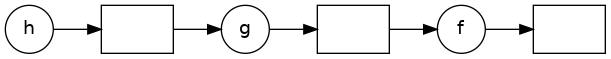

In [18]:
w.visualize(rankdir='LR')

Let's repeat our computation, this time reassigning the identifiers `f`, `g`, and `h`. The result is the same, but the functions `f`, `g`, and `h` are now decorated permanently by delayed. This means they always return Delayed objects that defer computation until the `compute()` method is called.

In [19]:
f = delayed(f)
g = delayed(g)
h = delayed(h)
w = f(g(h(4))) # no computation
type(w)
w.compute() # no computation until here # compute here 

dask.delayed.Delayed

4.123105625617661

To recap, we can define a function like `f` and rebind the label `f` to the new function obtained after applying the decorator delayed to the original `f`. The `@` symbol here is an equivalent shorthand notation to decorate functions in this manner. Here, the `@` symbol means _"apply the decorator function delayed to the function described below and bind that decorated function to the name `f`"._

In [20]:
def f(x):
    return sqrt(x+4)
f=delayed(f) # harder to read 

# easier to read 
# you already have a function, you want the execution parellel, add @. You don't have to change the function yourself. 
@delayed #equivalent to definition above # lazy evaluated. 
def f(x):
    return(x+4)

As another example, let's use the delayed decorator with some new functions increment, double, and add. This calculation involves repeated function evaluations within a loop. The dependencies are a little trickier - `c` depends on `a` and `b` within each iteration, and its computed value is appended to the list output.

In [21]:
@delayed
def increment(x):
    return x+1

@delayed
def double(x):
    return 2*x

@delayed
def add(x,y):
    return x+y

In [22]:
data = [1,2,3,4,5]
output = []

for x in data:
    a=increment(x) # increment and double do not execute depending on each other, they can execute in parallel.
    b=double(x) 
    c=add(a,b)
    output.append(c)
    
total=sum(output)

total
output # until the compute() method is called.

Delayed('add-e2eda56976573b10b318e66ee64f4a60')

[Delayed('add-3e4048f9-de04-4da3-a737-3f532cbcf788'),
 Delayed('add-880420ad-c3fd-44f3-93e4-de81fe550cba'),
 Delayed('add-97883544-98b0-427e-b8f3-931330fe08f4'),
 Delayed('add-3bd72e26-563c-4d7f-b5e4-577242e38f34'),
 Delayed('add-8634c8ad-aec1-4435-8a4b-178fbaa4d05f')]

The final result `total` is a `Delayed` object and `output` is a list of intermediate `Delayed` objects. The `visualize` method displays the sequence of evaluations needed to compute `total`.

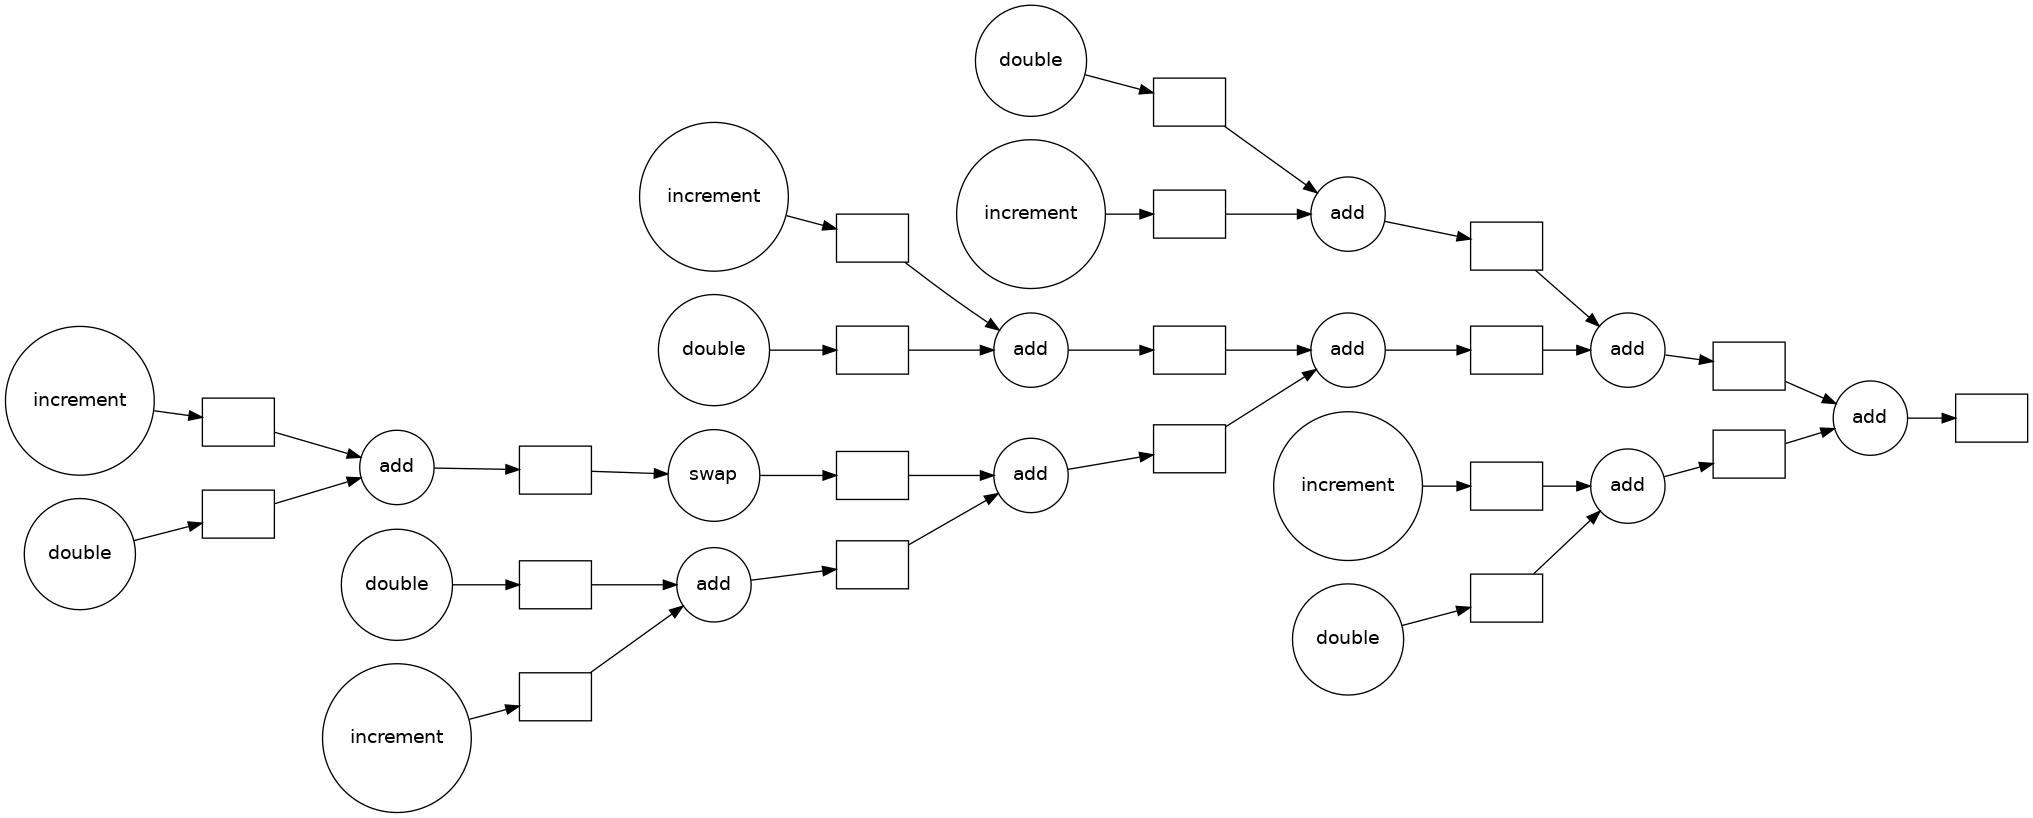

In [23]:
total.visualize(rankdir='LR') # when you compute(), it does it parellel. you don't need to do anything else. 

This is where Dask helps significantly. Dask uses a variety of heuristic schedulers for complicated execution sequences like this. The scheduler automatically assigns tasks **in parallel** to extra threads or processes. In particular, **Dask users do not have to decompose computations themselves.**
(it might not be optimal for every setup, but it usually does pretty good job more parallized more possible.) -> low level parallization. Higher level parallization-> instead of using pandas dataframe, use dask dataframe. Instead of using numpy array, use dask array. The functions you usually use to work with numpy and pandas, arrays and df are also available in Dask but in parallel way. You don't need to learn new syntax and datastructures. 

## Exercise 3: Taxicab revisited with Dask delayed

Let's repeat the Yellow Cab ride data analysis using Dask instead of generators. As before, we start with a list of 25 filenames for the CSV files. We define function `count_long_trips` as before, this time adding the `@delayed` decorator. We also define a `@delayed` function `read_file`.

In [24]:
template = 'yellow_tripdata_2015_{0}.csv'
filenames = [template.format(k) for k in range(1,26)] #list comprehension

@delayed
def count_long_trips(df):
    df['duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds #calculate trip time
    is_long_trip = df.duration > 1200 #find trips longer than 20 minutes in duration
    result_dict = {'n_long':[sum(is_long_trip)],
                   'n_total':[len(df)]} #save the number of long trips and total number of trips in a dictionary
    return pd.DataFrame(result_dict) #convert to dataframe

@delayed
def read_file(fname):
    return pd.read_csv(fname, parse_dates=[1,2])

totals=[count_long_trips(read_file(fname)) for fname in filenames] #list comprehension

annual_totals=sum(totals)

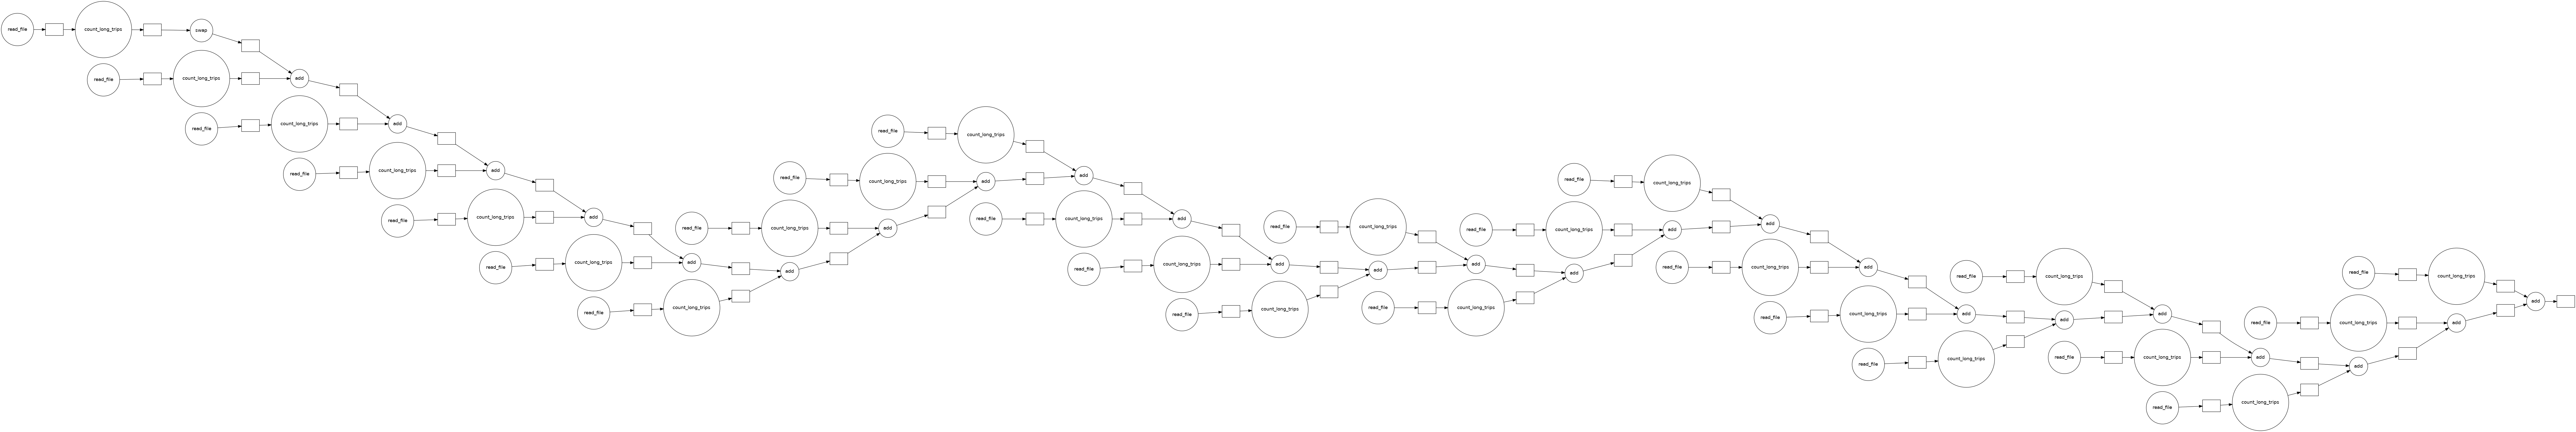

In [25]:
annual_totals.visualize(rankdir='LR')

In [26]:
annual_totals=annual_totals.compute() #invokation of Delayed object
annual_totals
annual_totals['n_long']/annual_totals['n_total']

n_long  n_total
0   37393   250000

0    0.149572
dtype: float64

We construct a pipeline, starting with a list comprehension of Delayed objects called `totals`. We accumulate the sum of totals in `annual_totals`. We invoke the compute method of the Delayed object `annual_totals`. The result yields a Pandas DataFrame with a single row and two columns. Notice this is all done with a straightforward use of Dask delayed functions rather than generators. Finally, the final result yields the fraction of trips over 20 minutes as before.

## Exercise 4 High occupancy trip proportion

Create three delayed functions to complete a pipeline for computing the proportion of trips with 2 or more passengers.
1. `count_trips`: total number of trips
2. `count_highocc_trips`: count the number of trips with 2 or more passengers
3. `pct_highocc`: aggregate the results (result from 1 divided by result from 2)

In [27]:
@delayed
def count_trips(df):
    return _____

@delayed
def count_highocc_trips(df):
    return ______
   
@delayed
def pct_highocc(n_highocc,n_total):
    return 100*________

Now that the `dask.delayed` functions are defined, we can use them to construct the pipeline of `delayed` tasks.  Loop over the file names, store the temporary information in lists, and aggregate the final result.  

In [28]:
n_highocc = []
n_total = []

template = 'yellow_tripdata_2015_{0}.csv'
filenames = [template.format(k) for k in range(1,26)]

for fname in filenames:
    df=pd.read_csv(fname, parse_dates=[1,2])
    
    n_highocc.append(_________)
    n_total.append(___________)
    
result = pct_highocc(____________)

print(result.compute())

29.3024


# 5. Now with Dask arrays!

We'll look first at **Dask arrays** as extensions of **NumPy arrays**. To start, we create a one-dimensional NumPy array `a` of 10,000 random numbers uniformly distributed between 0 and 1. Remember, NumPy arrays resemble lists, but are homogeneous in data type. They also have many attributes and convenient methods for numeric processing. Here, we print the array shape and data type. The shape is a singleton tuple with entry 10,000, and the datatype is float64 (a 64-bit floating-point number). We can also compute its sum and mean using appropriately-named methods.

In [27]:
a = np.random.rand(10000)
print(a.shape,a.dtype)
print(a.sum())
print(a.mean())

(10000,) float64
5020.647958400076
0.5020647958400076


We can import the module `dask.array` with alias da to use Dask arrays. The function `from_array` constructs a Dask array from a NumPy array. It requires an argument `chunks`; this is the number elements in each piece of `a`. The chunk-size here is the length of `a` divided by 4 (2,500 in this case). The Dask array attribute chunks is a tuple; all four chunks of `a_dask` have 2,500 elements.

In [29]:
import dask.array as da
a_dask = da.from_array(a, chunks=len(a) // 4)
a_dask.chunks
a_dask

((2500, 2500, 2500, 2500),)

dask.array<array, shape=(10000,), dtype=float64, chunksize=(2500,), chunktype=numpy.ndarray>

Let's compute the sum using four chunks explicitly in NumPy. We use integer division to determine `chunk_size` from the length of the original array. The variable result is used to accumulate the sum. Within a loop, we need to slice each chunk explicitly by finding its offset (the actual index where each chunk begins). We then apply the sum method to that chunk and add it to result. Notice each loop iteration is independent (so, they can be executed in parallel if possible). At the end, the accumulated sum can be printed.

In [31]:
#sum using 4 chunks explicitly in NumPy
n_chunks = 4
chunk_size = len(a) // n_chunks
result = 0 #accumulate sum
for k in range(n_chunks):
    offset = k*chunk_size
    a_chunk = a[offset:offset + chunk_size] #slice chunk
    result += a_chunk.sum() 
print(result)

5018.3703279356605


We'll redo the previous sum using a Dask array instead. To start, create a Dask array with an appropriate chunk-size. A single call to `sum` yields an unevaluated Dask object. Notice we don't need to compute offsets or slice chunks explicitly; the Dask array method does so for us. Calling `.compute()` forces evaluation of the sum (in parallel if possible). We can also view the associated Task Graph using `visualize()`. The option `rankdir='LR'` forces a horizontal layout.

In [32]:
#sum using Dask array
a_dask = da.from_array(a, chunks=len(a) // 4)
result = a_dask.sum()
result
print(result.compute())

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

5018.3703279356605


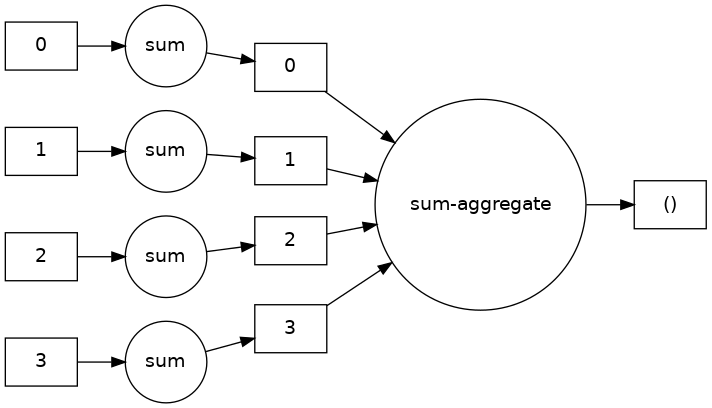

In [33]:
result.visualize(rankdir='LR')

The four rectangles in the middle represent our chunks of data. As data flows from left to right, the sum method is invoked on each chunk. The Dask scheduler can assign work to multiple threads or processes concurrently if available.

Dask arrays share many attributes and methods with NumPy arrays. We've seen `shape` and `dtype` already, but there are more common attributes:`ndim`,`nbytes`,`size`, etc.

Most NumPy array aggregations are also available for Dask arrays:`max`,`min`,`mean`,`std`,`var`,`sum`,`prod`,etc. These all yield a task graph similar to the previous one. 

Dask array transformations like reshaping, stacking, and transposing are also available. And, of course, many NumPy mathematical operations (`round`,`real`,`imag`,`conj`,`dot`, etc.) and universal functions also work with Dask arrays.

Let's time a sizeable computation. We construct a Dask array `dist_dask8` using 8 chunks and then time computation of its mean compared to using a single chunk. 

In [34]:
#create big numpy array then dask array with 8 chunks
N = (1024**2)//8 #Number of floats that fill 1MB
x = np.random.randn(1000*N) #Random array filling 1000MB
x_dask8 = da.from_array(x, chunks=x.shape[0]//8)

In [35]:
%timeit x.mean()

64.4 ms ± 2.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%timeit mean8 = x_dask8.mean().compute() # professor has 8 cores so he chooses 8.

39.7 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 6. Multi-dimensional arrays

First, recall working with NumPy arrays.

In [37]:
time_series=np.array([49, 51, 60, 54, 47, 50, 64, 58, 47, 43, 50, 63, 67, 68, 64, 48, 55, 46, 66, 51, 52])
table=time_series.reshape((3,7)) #reshape row-wise by week
table
table[0,4] #value from week 1, day 4
table[1, 2:5] #value from week 2, days 2-4

array([[49, 51, 60, 54, 47, 50, 64],
       [58, 47, 43, 50, 63, 67, 68],
       [64, 48, 55, 46, 66, 51, 52]])

47

array([43, 50, 63])

In [38]:
table.mean() #overall mean
table.mean(axis=0) #averages for days
table.mean(axis=1) #averages for weeks
table.mean(axis=(0,1)) #mean of rows, then columns

54.904761904761905

array([57.        , 48.66666667, 52.66666667, 50.        , 58.66666667,
       56.        , 61.33333333])

array([53.57142857, 56.57142857, 54.57142857])

54.904761904761905

In [39]:
table - table.mean(axis=0) #values minus daily means

array([[ -8.        ,   2.33333333,   7.33333333,   4.        ,
        -11.66666667,  -6.        ,   2.66666667],
       [  1.        ,  -1.66666667,  -9.66666667,   0.        ,
          4.33333333,  11.        ,   6.66666667],
       [  7.        ,  -0.66666667,   2.33333333,  -4.        ,
          7.33333333,  -5.        ,  -9.33333333]])

In [40]:
#table - table.mean(axis=1) #subtracting weekly means doesn't due to broadcasting limitations
table - table.mean(axis=1).reshape(3,1)

array([[ -4.57142857,  -2.57142857,   6.42857143,   0.42857143,
         -6.57142857,  -3.57142857,  10.42857143],
       [  1.42857143,  -9.57142857, -13.57142857,  -6.57142857,
          6.42857143,  10.42857143,  11.42857143],
       [  9.42857143,  -6.57142857,   0.42857143,  -8.57142857,
         11.42857143,  -3.57142857,  -2.57142857]])

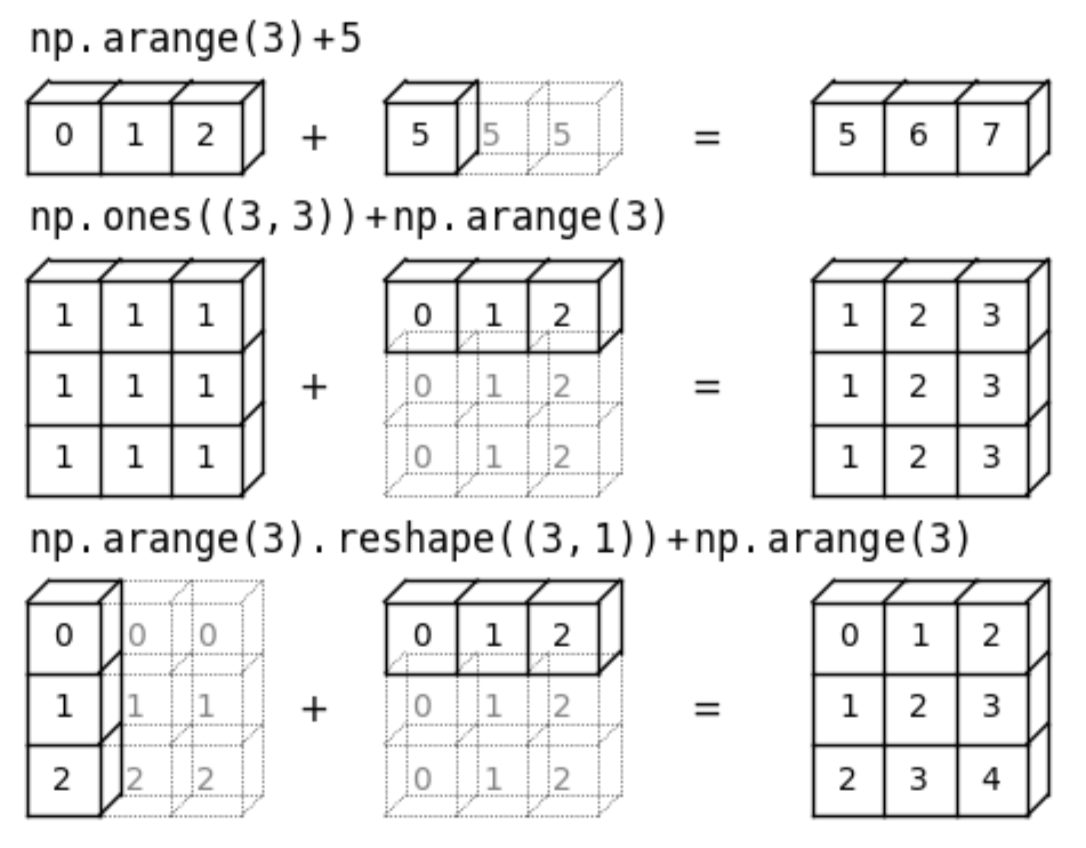

What does this have to do with Dask? We've reviewed NumPy conventions that work for Dask. We can convert data to a Dask array, specifying a tuple for a chunksize. At this point, the dask.array interface to compute a standard deviation is identical to that in Numpy. However, the computation is deferred until we invoke compute.

In [41]:
x = np.random.randn(366,4) # 366 rows, 4 columns 
x.shape
type(x)

(366, 4)

numpy.ndarray

In [42]:
x_dask = da.from_array(x, chunks=(366,2)) # first 2 columns-> first chunks. next 2 columns -> next chunks.
result = x_dask.std(axis=0) #standard deviation down columns
result.compute()

array([1.10444509, 1.01938224, 1.03757644, 1.02908872])

## Exercise 5: Practice with Dask arrays

In [43]:
x = np.random.rand(12,444,922)
x[5,123,234] = np.nan
x_dask = da.from_array(x, chunks=(1,444,922))

In [44]:
x_dask.min()

dask.array<amin-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [45]:
x_dask.min().compute()
x_dask.max().compute()
x_dask.mean().compute()

nan

nan

nan

In [46]:
lo=da.nanmin(x_dask).compute() #ignoring nans
hi=da.nanmax(x_dask).compute()
print(lo,hi)

da.nanmean(x_dask).compute()

1.3232144369101917e-07 0.9999998060534829


0.4996464579659974

Let's visualize a dask array.

Text(0.5, 1.0, '2008-01')

(-0.5, 921.5, -0.5, 443.5)

Text(0.5, 1.0, '2008-02')

(-0.5, 921.5, -0.5, 443.5)

Text(0.5, 1.0, '2008-03')

(-0.5, 921.5, -0.5, 443.5)

Text(0.5, 1.0, '2008-04')

(-0.5, 921.5, -0.5, 443.5)

Text(0.5, 1.0, '2008-05')

(-0.5, 921.5, -0.5, 443.5)

Text(0.5, 1.0, '2008-06')

(-0.5, 921.5, -0.5, 443.5)

Text(0.5, 1.0, '2008-07')

(-0.5, 921.5, -0.5, 443.5)

Text(0.5, 1.0, '2008-08')

(-0.5, 921.5, -0.5, 443.5)

Text(0.5, 1.0, '2008-09')

(-0.5, 921.5, -0.5, 443.5)

Text(0.5, 1.0, '2008-10')

(-0.5, 921.5, -0.5, 443.5)

Text(0.5, 1.0, '2008-11')

(-0.5, 921.5, -0.5, 443.5)

Text(0.5, 1.0, '2008-12')

(-0.5, 921.5, -0.5, 443.5)

Text(0.5, 0.98, 'Monthly averages (max. daily temperature [C])')

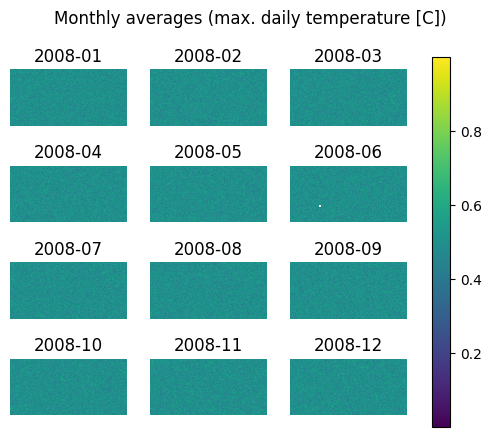

In [47]:
N_months = x_dask.shape[0] #number of images
import matplotlib.pyplot as plt
%matplotlib inline

fig, panels = plt.subplots(nrows=4, ncols=3)
for month, panel in zip(range(N_months), panels.flatten()):
    im = panel.imshow(x_dask[month,:,:],
                     origin='lower',vmin=lo,vmax=hi)
    panel.set_title('2008-{:02d}'.format(month+1))
    panel.axis('off')
    
plt.suptitle('Monthly averages (max. daily temperature [C])');
plt.colorbar(im, ax=panels.ravel().tolist()); #common colorbar
plt.show()

Let's stack NumPy arrays.

In [48]:
a = np.ones(3); b=2*a; c=3*a
print(a, '\n'); print(b, '\n'); print(c)

[1. 1. 1.] 

[2. 2. 2.] 

[3. 3. 3.]


In [49]:
np.stack([a,b]) #Makes 2D array of shape (2,3)
np.stack([a,b], axis=0) #same

array([[1., 1., 1.],
       [2., 2., 2.]])

array([[1., 1., 1.],
       [2., 2., 2.]])

In [50]:
X = np.stack([a,b])
Y = np.stack([b,c])
Z = np.stack([c,a])
print(X,'\n\n',Y,'\n\n',Z)

[[1. 1. 1.]
 [2. 2. 2.]] 

 [[2. 2. 2.]
 [3. 3. 3.]] 

 [[3. 3. 3.]
 [1. 1. 1.]]


In [51]:
np.stack([X,Y,Z]) #Makes 3D array of shape (3,2,3)
np.stack([X,Y,Z],axis=1) #makes 3D array of shape (2,3,3)

array([[[1., 1., 1.],
        [2., 2., 2.]],

       [[2., 2., 2.],
        [3., 3., 3.]],

       [[3., 3., 3.],
        [1., 1., 1.]]])

array([[[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.]],

       [[2., 2., 2.],
        [3., 3., 3.],
        [1., 1., 1.]]])

Now let's stack Dask arrays.

In [52]:
dsets = np.array([np.random.rand(12,444,922),
         np.random.rand(12,444,922),
         np.random.rand(12,444,922),
         np.random.rand(12,444,922)])

# List comprehension to make dask arrays: four years of data
monthly = [da.from_array(d, chunks=(1,444,922)) for d in dsets]

#stack with list of dask arrays
by_year = da.stack(monthly, axis=0)

by_year.shape

(4, 12, 444, 922)

# 7. Dask DataFrames

Let's examine Dask DataFrames now. **The Dask dataframe is a delayed version of the Pandas DataFrame**, just as the Dask array is a delayed version of the Numpy Array.

By convention, `dask.dataframe` is imported with the alias `dd`. There is substantial overlap in using Dask and Pandas DataFrames. For instance, the Dask `read_csv` function is like the Pandas `read_csv` function. It can read one or many files at once using an asterisk wildcard to match filename patterns and concatenate DataFrames. The function `dd.read_csv` does not actually read files until the DataFrame `.compute` method is invoked (just as we saw earlier with `dask.delayed` objects). As such, Dask DataFrames can contain more data than fits in available memory.

In [31]:
import dask.dataframe as dd

cabdata = dd.read_csv('yellow_tripdata_2015_*.csv', parse_dates=[1,2])
cabdata['duration'] = (cabdata.tpep_dropoff_datetime - cabdata.tpep_pickup_datetime).dt.seconds #calculate trip time

cabdata.head() # no need to use compute since head() doesn't need parallezation
cabdata.tail()
len(cabdata)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2015-01-15 19:05:39   2015-01-15 19:23:42                1   
1         1  2015-01-10 20:33:38   2015-01-10 20:53:28                1   
2         1  2015-01-10 20:33:38   2015-01-10 20:43:41                1   
3         1  2015-01-10 20:33:39   2015-01-10 20:35:31                1   
4         1  2015-01-10 20:33:39   2015-01-10 20:52:58                1   

   trip_distance  pickup_longitude  pickup_latitude  RateCodeID  \
0           1.59        -73.993896        40.750111           1   
1           3.30        -74.001648        40.724243           1   
2           1.80        -73.963341        40.802788           1   
3           0.50        -74.009087        40.713818           1   
4           3.00        -73.971176        40.762428           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -73.974785         40.750618             1   
1                  N         -73.994415         40.759109             1   
2                  N         -73.951820         40.824413             2   
3                  N         -74.004326         40.719986             2   
4                  N         -74.004181         40.742653             2   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         12.0    1.0      0.5        3.25           0.0   
1         14.5    0.5      0.5        2.00           0.0   
2          9.5    0.5      0.5        0.00           0.0   
3          3.5    0.5      0.5        0.00           0.0   
4         15.0    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  duration  
0                    0.3         17.05      1083  
1                    0.3         17.80      1190  
2                    0.3         10.80       603  
3                    0.3          4.80       112  
4                    0.3         16.30      1159

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
9995         2  2015-01-02 12:14:21   2015-01-02 12:30:57                1   
9996         1  2015-01-02 12:14:22   2015-01-02 12:35:08                4   
9997         2  2015-01-02 12:14:22   2015-01-02 12:27:01                1   
9998         2  2015-01-02 12:14:22   2015-01-02 12:28:52                6   
9999         2  2015-01-02 12:14:22   2015-01-02 12:20:38                1   

      trip_distance  pickup_longitude  pickup_latitude  RateCodeID  \
9995           1.64        -73.980263        40.739231           1   
9996           4.20        -73.957596        40.785412           1   
9997           2.44        -73.947861        40.770798           1   
9998           3.32        -74.014717        40.713356           1   
9999           1.38        -73.961105        40.772060           1   

     store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
9995                  N         -73.995598         40.752941             2   
9996                  N         -73.990974         40.732822             2   
9997                  N         -73.980576         40.773796             2   
9998                  N         -73.994614         40.750225             1   
9999                  N         -73.972343         40.781231             2   

      fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
9995         11.5    0.0      0.5         0.0           0.0   
9996         17.0    0.0      0.5         0.0           0.0   
9997         11.0    0.0      0.5         0.0           0.0   
9998         13.5    0.0      0.5         2.7           0.0   
9999          7.0    0.0      0.5         0.0           0.0   

      improvement_surcharge  total_amount  duration  
9995                    0.3          12.3       996  
9996                    0.0          17.8      1246  
9997                    0.3          11.8       759  
9998                    0.3          17.0       870  
9999                    0.3           7.8       376

250000

Let's look at an example of reading multiple files into a `dask.dataframe`. The working directory has 25 CSV files of NYC taxicab records from 2015. We call `dd.read_csv` and bind the result to `cabdata`. The input string `yellow_tripdata_2015_*.csv` is called a glob pattern. The asterisk is a wildcard character that matches zero or more valid filename characters. The data from all 25 files is automatically concatenated into a single Dask dataframe. The resulting dask dataframe has many methods in common with a Pandas DataFrame; for instance, head and tail. Notice that `.head` and `.tail` do not require that we invoke `.compute`. This is deliberate because, in most cases, no parallelism is needed to examine the leading or trailing rows from a Dask DataFrame. Most other Dask DataFrame methods, however, do need the compute method for evaluation.

Let's build a delayed pipeline to determine average trip duration for rides where no tip is recorded. We start by making a Boolean Dask series `no_tip`. The `.loc` accessor can use the series `no_tip` to filter the rows where no tip was recorded and the duration column from the Dask DataFrame `cabdata`. The result `cabdata_no_tip` is a Dask Series of type int64 that remains unevaluated until `.compute` is invoked.

In [54]:
no_tip = (cabdata['tip_amount'] == 0.0)
no_tip

cabdata_no_tip = cabdata.loc[no_tip, 'duration']
cabdata_no_tip

Dask Series Structure:
npartitions=25
    bool
     ...
    ... 
     ...
     ...
Name: tip_amount, dtype: bool
Dask Name: eq, 8 graph layers

Dask Series Structure:
npartitions=25
    int64
      ...
    ...  
      ...
      ...
Name: duration, dtype: int64
Dask Name: loc-series, 9 graph layers

dd.Scalar<series-..., dtype=float64>

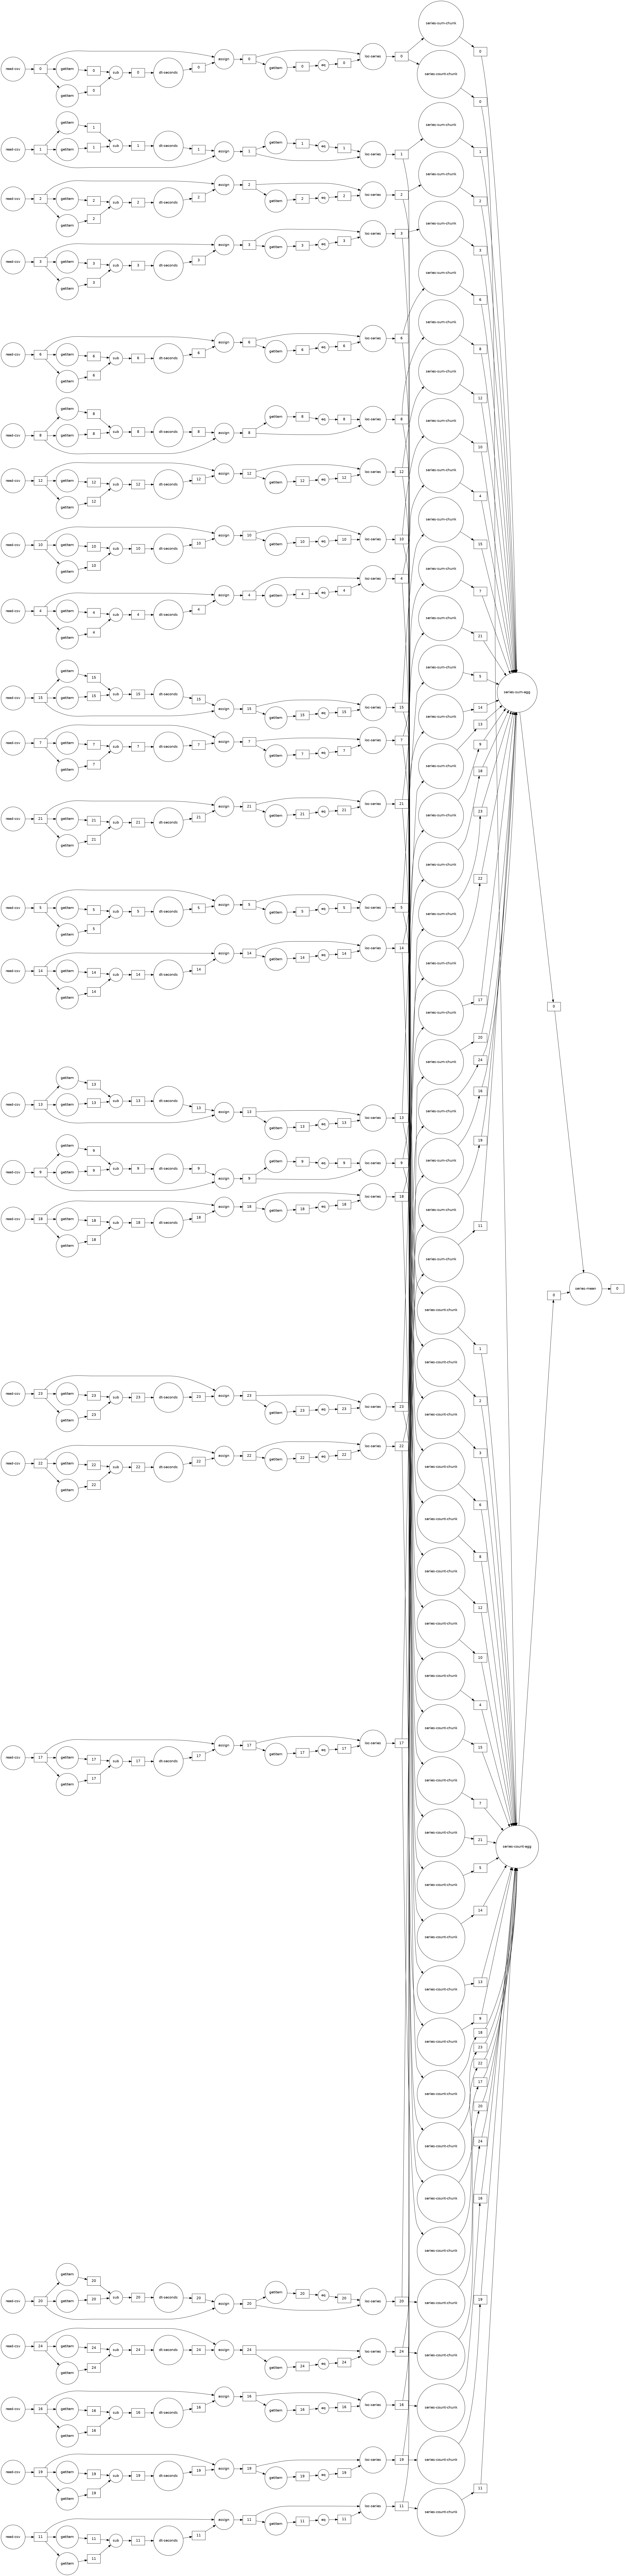

In [55]:
cabdata_no_tip.mean()
cabdata_no_tip.mean().visualize(rankdir='LR')

In [56]:
cabdata_no_tip.mean().compute()
cabdata['duration'].mean().compute()

754.0458354456804

782.572624

We can visualize a *task graph* summarizing this entire pipeline with the visualize method. The output is a *directed acyclic task graph* describing flow of data - the rectangles - through functions-the circles- from left to right. The 25 left-most circles correspond to reading each of the 25 CSV files. The filtering operations are independent, so all work across the 25 main channels can be executed in parallel by the Dask scheduler. The channels coalesce into the rightmost circles where the sum and count results are used to return the mean.

Be aware that some features Pandas DataFrames are not available with Dask DataFrames. For instance, Excel files and some compressed file formats are not supported as of version 0.15. Other tasks like sorting are genuinely hard to do in parallel. On the other hand, we've already seen that the `.loc` accessor works just as in Pandas. The same is true of setting and resetting the index. We've also used the `.sum()` method; other aggregations are similarly available. Many other parts of the Pandas DataFrame API carry over to Dask, for instance groupbys and datetime conversions.

## Exercise 6: Practice with Dask dataframes

Find the average total amount by the 4 different payment types.  Use the `.groupby` function.

In [33]:
cabdata_bypmt = cabdata.groupby('payment_type')
cabdata_bypmt['total_amount'].mean().compute()

payment_type
1    16.368856
2    12.205532
3    10.276343
4    11.960177
Name: total_amount, dtype: float64

## 7.1 Timing Dask DataFrame operations

In [58]:
%timeit cabdata = dd.read_csv('yellow_tripdata_2015_*.csv', parse_dates=[1,2])

10.2 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [59]:
%timeit cabdata['duration'].mean()

2.52 ms ± 80.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [60]:
%timeit cabdata['duration'].mean().compute() # run slower, not always fastest. 

695 ms ± 22.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 8. When to use Dask? Some considerations:
1. How big is the dataset?
2. How much RAM is available?
3. How many threads/cores/CPUs are available?
4. Are Pandas computations/formats supported in Dask?
5. Is computation *I/O-bound (disk-intensive)* or *CPU-bound (processor intensive)*

Best use case for Dask
1. Computations from Pandas available in Dask
2. Problem size close to limits of RAM, fits on disk

# 9. Dask bags

List-like structure for unstructured and semi-structured data.  We will not cover this in the course - just know it exists.

# 10. Dask diagnostics

In [34]:
from dask.diagnostics import Profiler, ResourceProfiler, CacheProfiler
prof = Profiler()
rprof = ResourceProfiler(dt=0.25) #set time step to 0.25 seconds
cprof = CacheProfiler()

a = da.random.random(size=(10000, 1000), chunks=(1000, 1000))
q, r = da.linalg.qr(a)
a2 = q.dot(r)

with prof, rprof, cprof:
    out = a2.compute()

#with prof, rprof, cprof:
#    cabdata.groupby("passenger_count").tip_amount.mean().compute()

from dask.diagnostics import visualize
visualize([prof, rprof, cprof],filename='myprofile.html')

Column(id='1240', ...)

# 11. Scikit-Learn with Dask

Examples from https://examples.dask.org/machine-learning.html

## 11.1 Distributed hyperparameter tuning in Dask

In [35]:
from dask.distributed import Client, progress
client = Client(dashboard_address=':8797', n_workers=5, threads_per_worker=1, memory_limit='2GB')
client # dashboard: monitor how the cluster is used in real time-> track the performance of cluster especially using codes that needs to be run for a long time.

<Client: 'tcp://127.0.0.1:36001' processes=5 threads=5, memory=9.31 GiB>

In [36]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X, y = make_classification(n_samples=1000, random_state=0)
X[:5]

array([[-1.06377997,  0.67640868,  1.06935647, -0.21758002,  0.46021477,
        -0.39916689, -0.07918751,  1.20938491, -0.78531472, -0.17218611,
        -1.08535744, -0.99311895,  0.30693511,  0.06405769, -1.0542328 ,
        -0.52749607, -0.0741832 , -0.35562842,  1.05721416, -0.90259159],
       [ 0.0708476 , -1.69528125,  2.44944917, -0.5304942 , -0.93296221,
         2.86520354,  2.43572851, -1.61850016,  1.30071691,  0.34840246,
         0.54493439,  0.22532411,  0.60556322, -0.19210097, -0.06802699,
         0.9716812 , -1.79204799,  0.01708348, -0.37566904, -0.62323644],
       [ 0.94028404, -0.49214582,  0.67795602, -0.22775445,  1.40175261,
         1.23165333, -0.77746425,  0.01561602,  1.33171299,  1.08477266,
        -0.97805157, -0.05012039,  0.94838552, -0.17342825, -0.47767184,
         0.76089649,  1.00115812, -0.06946407,  1.35904607, -1.18958963],
       [-0.29951677,  0.75988955,  0.18280267, -1.55023271,  0.33821802,
         0.36324148, -2.10052547, -0.4380675 , -

In [37]:
param_grid = {"C": [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
              "kernel": ['rbf', 'poly', 'sigmoid'],
              "shrinking": [True, False]}

grid_search = GridSearchCV(SVC(gamma='auto', random_state=0, probability=True),
                           param_grid=param_grid,
                           return_train_score=False,
                           cv=5,
                           n_jobs=-1)

import joblib
with joblib.parallel_backend('dask'):
    grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=SVC(gamma='auto', probability=True, random_state=0),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
                         'kernel': ['rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]})

In [65]:
pd.DataFrame(grid_search.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.155952      0.017905         0.008627        0.000482   0.001   
1       0.149871      0.015967         0.009758        0.000461   0.001   
2       0.101786      0.001946         0.004633        0.000188   0.001   
3       0.105799      0.002121         0.004679        0.000214   0.001   
4       0.215078      0.002401         0.009856        0.000520   0.001   

  param_kernel param_shrinking  \
0          rbf            True   
1          rbf           False   
2         poly            True   
3         poly           False   
4      sigmoid            True   

                                              params  split0_test_score  \
0   {'C': 0.001, 'kernel': 'rbf', 'shrinking': True}              0.505   
1  {'C': 0.001, 'kernel': 'rbf', 'shrinking': False}              0.505   
2  {'C': 0.001, 'kernel': 'poly', 'shrinking': True}              0.505   
3  {'C': 0.001, 'kernel': 'poly', 'shrinking': Fa...              0.505   
4  {'C': 0.001, 'kernel': 'sigmoid', 'shrinking':...              0.505   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0              0.505                0.5                0.5                0.5   
1              0.505                0.5                0.5                0.5   
2              0.505                0.5                0.5                0.5   
3              0.505                0.5                0.5                0.5   
4              0.505                0.5                0.5                0.5   

   mean_test_score  std_test_score  rank_test_score  
0            0.502        0.002449               43  
1            0.502        0.002449               43  
2            0.502        0.002449               43  
3            0.502        0.002449               43  
4            0.502        0.002449               43

In [66]:
grid_search.predict(X)[:5]

array([0, 1, 1, 1, 0])

In [67]:
grid_search.score(X, y)

0.989

## 11.2 Training on large datasets

Most estimators in scikit-learn are designed to work on in-memory arrays. Training with larger datasets may require different algorithms.  All of the algorithms implemented in Dask-ML work well on larger than memory datasets, which you might store in a dask array or dataframe.

In [68]:
import dask_ml.datasets
import dask_ml.cluster

In [69]:
X, y = dask_ml.datasets.make_blobs(n_samples=10000000,
                                   chunks=1000000,
                                   random_state=0,
                                   centers=3)
X = X.persist()
X

dask.array<concatenate, shape=(10000000, 2), dtype=float64, chunksize=(1000000, 2), chunktype=numpy.ndarray>

In [70]:
km = dask_ml.cluster.KMeans(n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

/usr/local/lib/python3.9/site-packages/dask/base.py:1367: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


KMeans(init_max_iter=2, n_clusters=3, oversampling_factor=10)

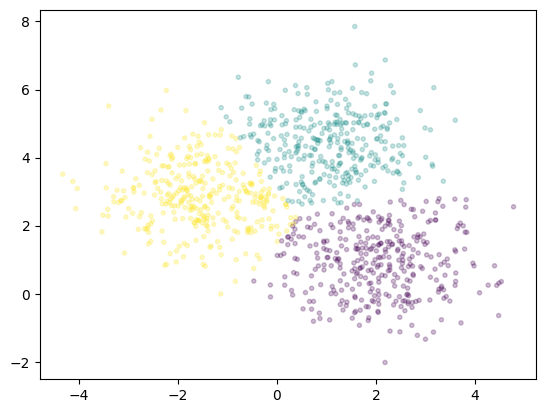

In [71]:
fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);

Visit https://ml.dask.org/ for great documentation and use cases for the machine learning algorithms available with Dask parallelization for scalability.